In [26]:
% matplotlib inline

import cv2
from PIL import Image 
import matplotlib.pyplot as plt 
import numpy as np
import glob

# Create a dataset by extracting face images from video

In [17]:
def resize_and_save(width, height, image, path):
    img = Image.fromarray(image)
    img = img.resize((width, height), Image.BILINEAR)
    img.save(path)
    
def face_detected(image):
    try:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    except:
        print('Image corrupted')
        return False, None
    face_cascade = cv2.CascadeClassifier('./../detector_architectures/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 2)
    if len(faces) > 1 or len(faces) == 0:
        return False, None
    return True, image[faces[0][1]:faces[0][1]+faces[0][3], faces[0][0]:faces[0][0]+faces[0][2]]

def extract_imgs(video_path, dst_path):
    vidcap = cv2.VideoCapture(video_path)
    success, img = vidcap.read()
    count = 0
    while success:
        frame_accepted, face_img = face_detected(img)
        if frame_accepted:
            face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
            resize_and_save(64, 64, face_img, dst_path+'/frame%d.jpg'%count)
            count += 1
        success, img = vidcap.read()
        
    print("Images extracted to ", dst_path)

video_faceA = './videos/Zlatan.mp4'
video_faceB = './videos/Alberto.mp4'

extract_imgs(video_faceA, './dataset/faceA')
extract_imgs(video_faceB, './dataset/faceB')

Images extracted to  ./dataset/faceA
Images extracted to  ./dataset/faceB


# Load dataset 

Total images:  639


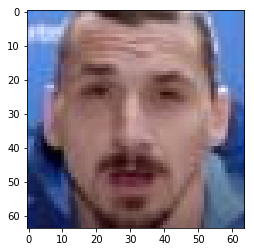

In [24]:
faceA = './dataset/faceA/*.jpg'
faceB = './dataset/faceB/*.jpg'
paths = glob.glob(faceA) + glob.glob(faceB)
faces = []

for img_path in paths:
    faces.append(plt.imread(img_path))

print("Total images: ", len(faces))
plt.imshow(faces[0])

In [27]:
data = np.array(faces)
data.shape

(639, 64, 64, 3)

### Reduce down the entire dataset to a single representation

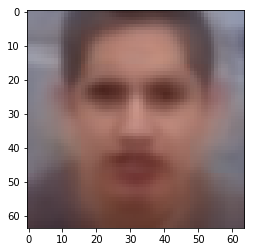

In [29]:
# Describe what most of our data looks like 
mean_img = np.mean(data, axis=0)
plt.imshow(mean_img.astype(np.uint8))

### Display where and how much there is in our previous mean image representation

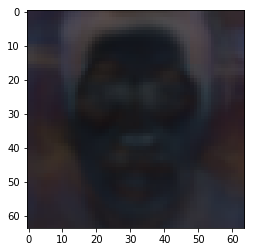

In [30]:
# Describe where change are likely to be in our dataset 
std_img =np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))

### Average variance 

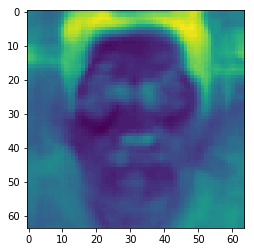

In [32]:
# how every color channel will vary as a heatmap
# The more red, the more likely that our mean image is not the best representation
# The more blue, the less likely that our mean image is far off from any other possible image.
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8))